[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GRJ03/ML_Projects2/blob/main/Credit_Assessment.ipynb)

In [25]:
!pip install scikit-learn==1.3.0

In [26]:
!pip install --upgrade xgboost

# Importing Libraries

In [27]:
import pandas as pd

# Reading the dataset

In [28]:
df=pd.read_csv('Credit__dataset.csv')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Dropping useless columns

In [29]:
#We don't need the ID column,so lets drop it.
df =df.drop(["ID"],axis=1)

In [30]:
#Changing the name of  pay_0 column to pay_1 to make the numbering correct
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [31]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [32]:
#Removing Unwanted categorical levels as mentioned in data exploration
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


In [33]:
# Handle unwanted categories in EDUCATION and MARRIAGE columns
df["EDUCATION"]=df["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
df["MARRIAGE"]=df["MARRIAGE"].map({0:3,1:1,2:2,3:3})

# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X=df.drop(['default.payment.next.month'],axis=1)
X=scaling.fit_transform(X)

In [35]:
y=df['default.payment.next.month']

In [36]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [37]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

# Training the Model

In [38]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime

# Define XGBClassifier and parameter grid
classifier = XGBClassifier()
params = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=params,
    n_iter=5,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=3
)

# Timer function
def timer(start_time=None):
    if not start_time:
        return datetime.now()
    else:
        elapsed = datetime.now() - start_time
        print(f'\n Time taken: {elapsed}')

# Fit the model
start_time = timer()
random_search.fit(X, y)
timer(start_time)

# Display results
print(f"Best Parameters: {random_search.best_params_}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0:00:32.204522
Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}


In [39]:
classifier = xgboost.XGBClassifier(
    base_score=0.5,
    booster='gbtree',
    colsample_bylevel=1,
    colsample_bytree=0.4,
    gamma=0.1,
    learning_rate=0.25,
    max_delta_step=0,
    max_depth=3,
    min_child_weight=7,
    n_estimators=100,
    n_jobs=1,
    objective='binary:logistic',
    random_state=0,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    subsample=1,
    verbosity=1
)

# Evaluating Cross_validation Score

In [40]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

In [41]:
# Print the individual fold scores
print("Cross-validation scores for each fold:", score)

Cross-validation scores for each fold: [0.80733333 0.808      0.81633333 0.80566667 0.81666667 0.825
 0.83666667 0.83133333 0.82766667 0.82466667]


In [42]:
# Print the mean and standard deviation of the cross-validation scores
print(f"Mean cross-validation score: {score.mean():.4f}")
print(f"Standard deviation of cross-validation score: {score.std():.4f}")

Mean cross-validation score: 0.8199
Standard deviation of cross-validation score: 0.0102


# Cross-Validation Score Visualization

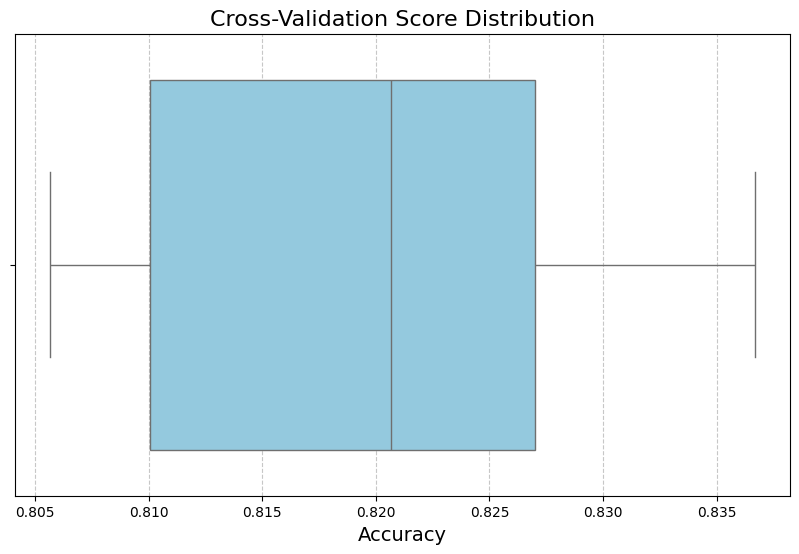

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Cross-Validation Scores
plt.figure(figsize=(10, 6))
sns.boxplot(score, orient='h', color='skyblue')
plt.title('Cross-Validation Score Distribution', fontsize=16)
plt.xlabel('Accuracy', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()